Data Date Range:
    <br />Start time: 2016-05-05 09:40:26
    <br />End time: 2018-01-17 01:59:42
    
#### This notebook does the following analysis:
All trailers that are viewed:
    - Quantiles, distribution, boxplots of popularity, avgRating, age of all movies whose trailers are played

All recommendations:
- Quantiles, distributions, boxplots of popularity, avgRating, age of all trailers, grouped by algorithms

#### The data used below is based on the data retrieved on 1.17.2018

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Find median popularity, avgRating, age for all trailers played

In [3]:
trailers_played = pd.read_csv('../Clean_Data/trailers_played_info.csv')

In [4]:
trailers_played.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
trailers_played.head()

,userId,loginId,movieId,action,avgRating,popularityLastYear,age_month,count
0,206537,trHzqo0,148482,PlayedFromLaunch,3.42,15.0,16.83,8
1,285205,amb977W,66156,PlayedFromLaunch,3.31,4.0,252.25,3
2,283320,5NUxm3d,4612,PlayedFromLaunch,3.78,5.0,789.75,2
3,271845,28lSfpJ,60684,PlayedFromLaunch,3.71,1738.0,218.08,134
4,271845,28lSfpJ,4448,PlayedFromLaunch,3.47,200.0,450.83,69


In [64]:
trailers_played.quantile(0.25)

userId                267315.00
movieId                 6035.00
avgRating                  3.27
popularityLastYear        37.00
age_month                 77.17
count                     12.00
Name: 0.25, dtype: float64

In [65]:
trailers_played.median()

userId                289112.00
movieId                74458.00
avgRating                  3.61
popularityLastYear       192.00
age_month                245.42
count                     36.00
dtype: float64

In [11]:
trailers_played.quantile(0.75)

Unnamed: 0            136482.00
userId                303006.00
movieId               127202.00
avgRating                  3.85
popularityLastYear       711.00
age_month                503.58
count                     91.00
Name: 0.75, dtype: float64

### Visualize the number of times trailers are played

In [10]:
trailers_played_count = trailers_played[['movieId','count']].copy()

In [11]:
trailers_played_count.sort_values(by=["count"],inplace=True)

In [12]:
trailers_played_count.reset_index(drop=True,inplace=True)

In [13]:
trailers_played_count.reset_index(inplace=True)

In [14]:
trailers_played_count['row_id'] = trailers_played_count.index
trailers_played_count.drop_duplicates(subset="movieId",inplace=True)

In [16]:
trailers_played_count.tail()

,index,movieId,count,row_id
179903,179903,140174,367,179903
180270,180270,318,368,180270
180638,180638,114935,403,180638
181041,181041,68237,457,181041
181498,181498,160718,479,181498


(0, 200)

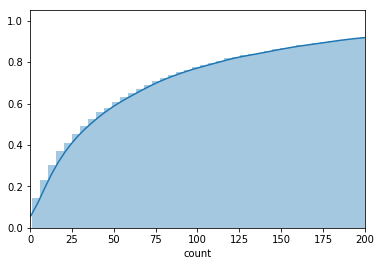

In [15]:
ax = sns.distplot(trailers_played_count['count'],
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True), bins=100)
ax.set_xlim(0,200)

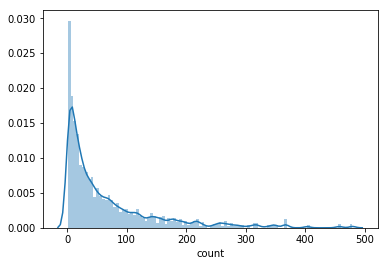

In [19]:
x4 = pd.Series(trailers_played['count'], name="count")
ax = sns.distplot(x4, bins=100)

### Distribution of popularity, avgRating, age of RC trailers

In [9]:
rec_played = pd.read_csv("../Clean_Data/rec_played_alg.csv")

In [10]:
rec_seed_info = pd.read_csv("../Clean_Data/rec_seed_info.csv")

In [11]:
rec_seed_info.drop_duplicates(["movieId"],inplace=True)

In [13]:
rec_played_info = pd.merge(rec_played, rec_seed_info, on=['movieId'], how='left')

In [14]:
rec_played_info.drop(["Unnamed: 0","action","loginId_y","sessionIds_y","userId_y"], axis=1, inplace=True)

In [37]:
rec_played_info.median()

userId_x                        295737.00
movieId                          83155.50
position                             5.00
sessionIds_x                         2.00
SeedMovie                        67997.00
avgRating                            3.59
popularityLastYear                 203.00
avgRating_seedmovie                  3.66
popularityLastYear_seedmovie       242.00
age_month                           85.77
age_seedmovie_month                 98.00
dtype: float64

In [38]:
rec_played_info.quantile(0.25)

userId_x                        279017.00
movieId                           5546.25
position                             2.00
sessionIds_x                         1.00
SeedMovie                         5995.00
avgRating                            3.27
popularityLastYear                  66.00
avgRating_seedmovie                  3.40
popularityLastYear_seedmovie        81.00
age_month                           22.77
age_seedmovie_month                 33.00
Name: 0.25, dtype: float64

In [39]:
rec_played_info.quantile(0.75)

userId_x                        305672.00
movieId                         133273.00
position                             8.00
sessionIds_x                         6.00
SeedMovie                       111384.00
avgRating                            3.84
popularityLastYear                 750.00
avgRating_seedmovie                  3.84
popularityLastYear_seedmovie       908.00
age_month                          205.70
age_seedmovie_month                186.00
Name: 0.75, dtype: float64

### Find median popularity, avgRating, age for all recommendations

In [15]:
#Drop rows with any NA values
rec_info = pd.read_csv('../Clean_Data/rec_movieinfo_wpopularity_agemonth.csv')
# movie_data_rec_small = movie_data_rec[movie_data_rec['popularity']!=0].dropna(how='any')
# rec_info_small = rec_info.drop('Unnamed: 0',axis=1).dropna()


In [16]:
rec_count = rec_info.groupby(["Algorithm","movieId"]).count().reset_index()

In [17]:
rec_count2 = rec_count.drop(['SeedMovie','avgRating','popularityLastYear','age_month'],axis=1).rename(columns={"loginId":"count"})


In [18]:
rec_info_count = pd.merge(rec_info, rec_count2, on=["movieId","Algorithm"], how="left")

In [19]:
rec_info_count.head()

,Algorithm,SeedMovie,loginId,movieId,avgRating,popularityLastYear,age_month,count
0,PredictedRating,4612,5NUxm3d,1354,3.85,106.0,592.58,95
1,PredictedRating,4612,5NUxm3d,5772,3.83,36.0,1052.08,131
2,PredictedRating,4612,5NUxm3d,6981,3.97,21.0,1866.33,7
3,PredictedRating,4612,5NUxm3d,1358,3.98,187.0,591.58,132
4,PredictedRating,4612,5NUxm3d,2858,4.13,3333.0,506.42,3511


In [20]:
rec_info_count.groupby("Algorithm").quantile(0.25)

0.25,SeedMovie,age_month,avgRating,count,movieId,popularityLastYear
Algorithm,,,,,,
FilmReleaseDate,4571.0,30.75,3.28,293.0,115569.0,97.0
PredictedRating,4493.0,179.75,3.61,96.0,2360.0,217.0
ShuffledTopPicks,6187.0,214.08,2.98,71.0,546.0,4.0
TagSimilarity,4628.0,220.58,3.34,53.0,3300.0,43.0


In [21]:
rec_info_count.groupby("Algorithm").quantile(0.5)

0.5,SeedMovie,age_month,avgRating,count,movieId,popularityLastYear
Algorithm,,,,,,
FilmReleaseDate,55247.0,49.58,3.59,730.0,136016.0,213.0
PredictedRating,55118.0,410.92,3.85,331.0,8529.0,891.0
ShuffledTopPicks,73023.0,617.33,3.31,142.0,42946.0,70.0
TagSimilarity,54281.0,422.00,3.65,126.0,8340.0,171.0


### Find the median number of times a movie is recommended by each algorithm

(0, 200)

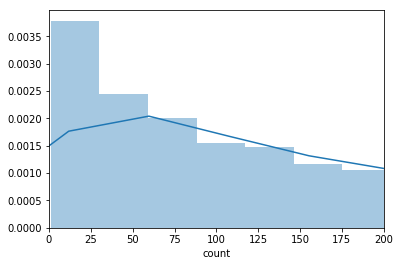

In [89]:
x1 = pd.Series(rec_info_count[rec_info_count["Algorithm"]=="PredictedRating"]['count'])
ax = sns.distplot(x1,bins=200)
ax.set_xlim(0,200)


(0, 200)

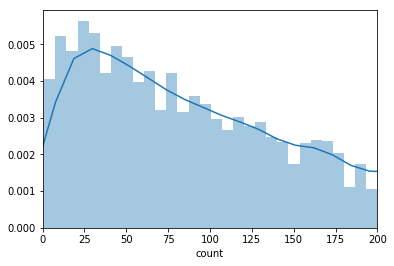

In [90]:
x2 = pd.Series(rec_info_count[rec_info_count["Algorithm"]=="TagSimilarity"]['count'])
ax = sns.distplot(x2,bins=200)
ax.set_xlim(0,200)

(0, 1000)

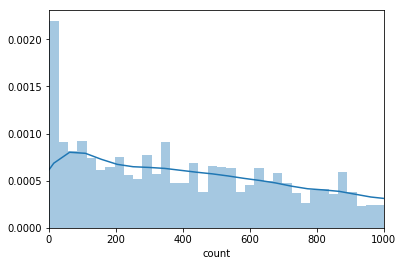

In [88]:
x3 = pd.Series(rec_info_count[rec_info_count["Algorithm"]=="FilmReleaseDate"]['count'])
ax = sns.distplot(x3,bins=200)
ax.set_xlim(0,1000)

### Distribution of popularity, avgRating, age of all recommendations

(0, 4000)

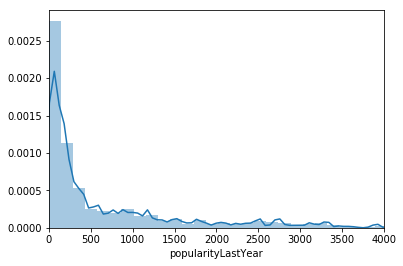

In [10]:
x1 = pd.Series(rec_info['popularityLastYear'], name="popularityLastYear")
ax = sns.distplot(x1)
ax.set_xlim(0,4000)

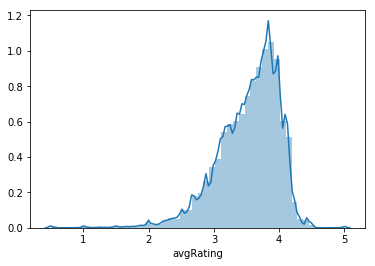

In [11]:
x2 = pd.Series(rec_info['avgRating'], name="avgRating")
sns.distplot(x2)

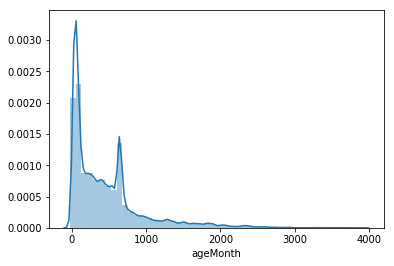

In [19]:
x3 = pd.Series(rec_info['age_month'], name="ageMonth")
ax = sns.distplot(x3)

### Distribution of popularity, avgRating, age of all recommendations, grouped by Algorithm

(0, 30000)

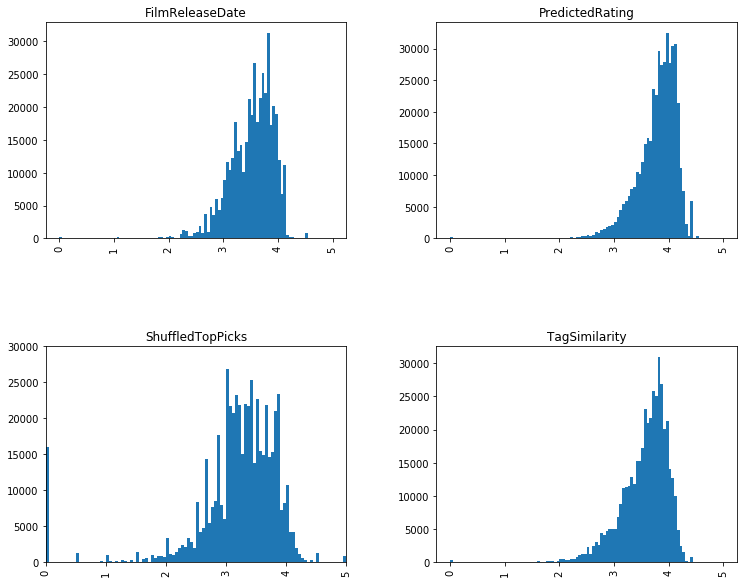

In [56]:
# x = np.random.randn(1000, 3)

as_list = rec_info_small['avgRating'].hist(by=rec_info_small['Algorithm'],figsize=(12,10),bins=100)

as_list[1][0].set_xlim(0,5)
as_list[1][0].set_ylim(0,30000)
# The code below works, but the font size is really small
# g = sns.FacetGrid(movie_data_rec_small, col="recommenderId", col_wrap=2, size=10)
# g = g.map(plt.hist, "popularity", bins=100)



(0, 40000)

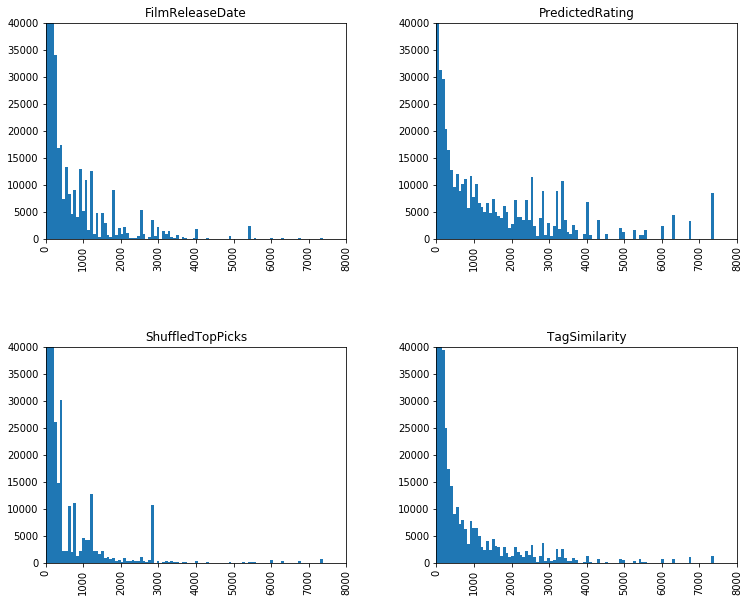

In [55]:
# Zoom in and set the same range for all graphs
as_list = rec_info_small['popularityLastYear'].hist(by=rec_info_small['Algorithm'],figsize=(12,10),bins=100)

as_list[0][0].set_xlim(0,8000)
as_list[0][0].set_ylim(0,40000)

as_list[0][1].set_xlim(0,8000)
as_list[0][1].set_ylim(0,40000)

as_list[1][0].set_xlim(0,8000)
as_list[1][0].set_ylim(0,40000)

as_list[1][1].set_xlim(0,8000)
as_list[1][1].set_ylim(0,40000)

(0, 100000)

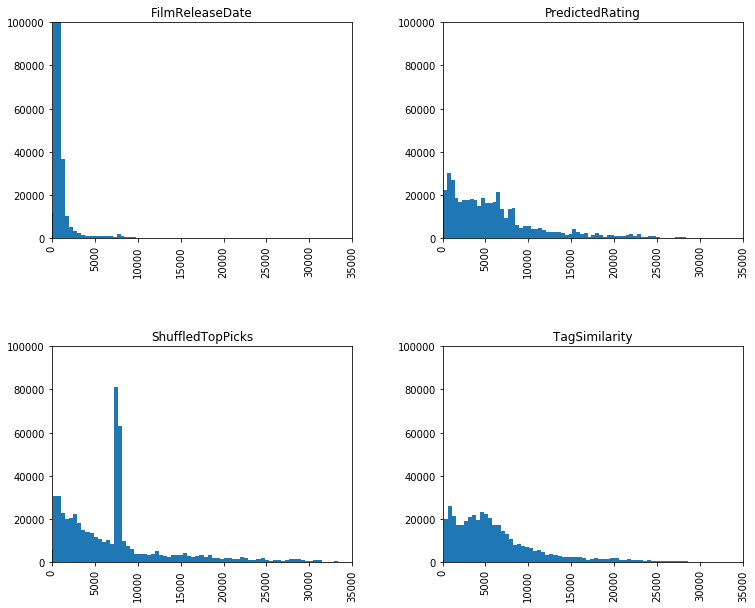

In [50]:
as_list = rec_info_small['age'].hist(by=rec_info_small['Algorithm'],figsize=(12,10),bins=100)
as_list[0][0].set_xlim(0,35000)
as_list[0][0].set_ylim(0,100000)

as_list[0][1].set_xlim(0,35000)
as_list[0][1].set_ylim(0,100000)

as_list[1][0].set_xlim(0,35000)
as_list[1][0].set_ylim(0,100000)

as_list[1][1].set_xlim(0,35000)
as_list[1][1].set_ylim(0,100000)

###  Boxplots of popularity, avgRating and age of all recommendations, grouped by Algorithms ####

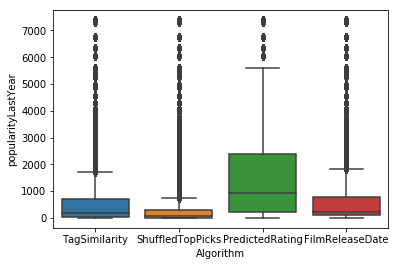

In [25]:
sns.boxplot(x='Algorithm', y='popularityLastYear', data= rec_info_small)

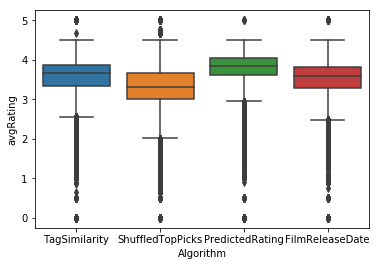

In [26]:
sns.boxplot(x='Algorithm', y='avgRating', data= rec_info_small)

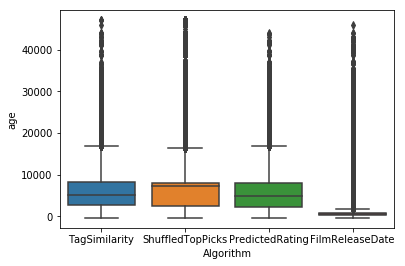

In [47]:
bplt = sns.boxplot(x='Algorithm', y='age', data= rec_info_small)

# Set y limit

# axes = bplt.axes
# axes.set_ylim(0,20000)